<a href="https://colab.research.google.com/github/rhysdavies21/library/blob/master/omega__new_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparing the Omega Measure across asset class**

**1. Load libraries and input**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Version check
print('pandas verion: ', pd.__version__)
print('matplotloib version: ', mpl.__version__)

# Create class of formats
class color:
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'
  END = '\033[0m'


pandas verion:  1.5.3
matplotloib version:  3.7.1


**2. Import and process and review historical price data**

In [2]:
# Import data from CSV
path = 'https://raw.githubusercontent.com/rhysdavies21/library/master/historical_financial_data_series.csv'
raw_data = pd.read_csv(path)
raw_data = raw_data.set_index('Date')

# Review data
start_date = raw_data.index[0]
end_date = raw_data.index[len(raw_data)-1]

print('Start data: ', start_date)
print('End data: ', end_date)
print('Review shape of raw_data: ', raw_data.shape)

display(raw_data.head(3))

Start data:  4-Jan-05
End data:  2-Jun-14
Review shape of raw_data:  (114, 6)


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
4-Jan-05,599.660027,188.9,2544.55,610.268260,155.44,156.62
1-Feb-05,598.227176,189.6,2577.03,609.325902,155.53,156.56
1-Mar-05,592.015823,190.5,2637.88,614.146672,154.36,155.01


**3. Create performance data time**

In [3]:
# Change into performance metric
perf_df = raw_data.pct_change(periods=1)  # Calculate performance: (data_adjclose['asset'][1] / data_adjclose['asset'][0])-1

# Create asset_list
asset_list = list(perf_df.columns)[0:]

print('Review shape of perf_df: ', perf_df.shape)

# Review data
display(perf_df.head(3))

Review shape of perf_df:  (114, 6)


,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Date,,,,,,
4-Jan-05,NaN,NaN,NaN,NaN,NaN,NaN
1-Feb-05,-0.002389,0.003706,0.012765,-0.001544,0.000579,-0.000383
1-Mar-05,-0.010383,0.004747,0.023612,0.007912,-0.007523,-0.009900


**4. Define calc_function to calculate and illustrate Omega by asset and threshold**

In [4]:
def calculate_omega_ratio_multi_threshold(returns_matrix, threshold_array, performance_period_divisor):
# Inputs of historical performances indexed by date, a set of Omega threshold, and the period over which performance measured.
# This function then calculates the Omega measure for each underlying (where each column in csv represents one underlying) and
# plot the Omega for each underlying againt the range of thresholds.
  omega_by_asset = []
  col_threshold = []
  for threshold in threshold_array:
    gains = returns_matrix[returns_matrix > threshold] - threshold
    losses = -(returns_matrix[returns_matrix < threshold] - threshold)
    average_gain = np.mean(gains, axis=0) if len(gains) > 0 else 0
    average_loss = np.mean(losses, axis=0) if len(losses) > 0 else 0
    average_loss[average_loss==0] = np.nan #Avoid division by zero
    omega_ratio = (average_gain / average_loss)
    col_threshold.append(threshold)
    omega_by_asset.append(omega_ratio)
    present_df = pd.DataFrame(columns=asset_list[:], data=omega_by_asset)
    present_df['Threshold Heading'] = [item *performance_period_divisor for item in col_threshold]
    present_df.set_index('Threshold Heading', inplace=True)
  display(present_df)

  plt = present_df.plot(kind='line', figsize=(20,8), linewidth=3)
  plt.set_title('Omega by Threshold for group of assets', size=16)
  plt.set_xlabel('Threshold', fontsize=14)
  plt.set_ylabel('Omega', fontsize=14)
  plt.legend(loc='upper right', fontsize=14)
  plt.plot()


**5. Run the calculation**

,HFRXGL_GBP,UKRPI,UKXT,MXWO_GBP,QX6G,QX6I
Threshold Heading,,,,,,
0.00,1.187360,1.031062,0.923527,0.976568,1.424324,1.284776
0.03,0.948754,0.704314,0.864907,0.881781,1.107265,1.075662
0.06,1.009864,0.446587,0.778793,0.824104,0.980058,1.146902
0.09,0.978426,0.158856,0.725169,0.741176,0.909695,0.924283


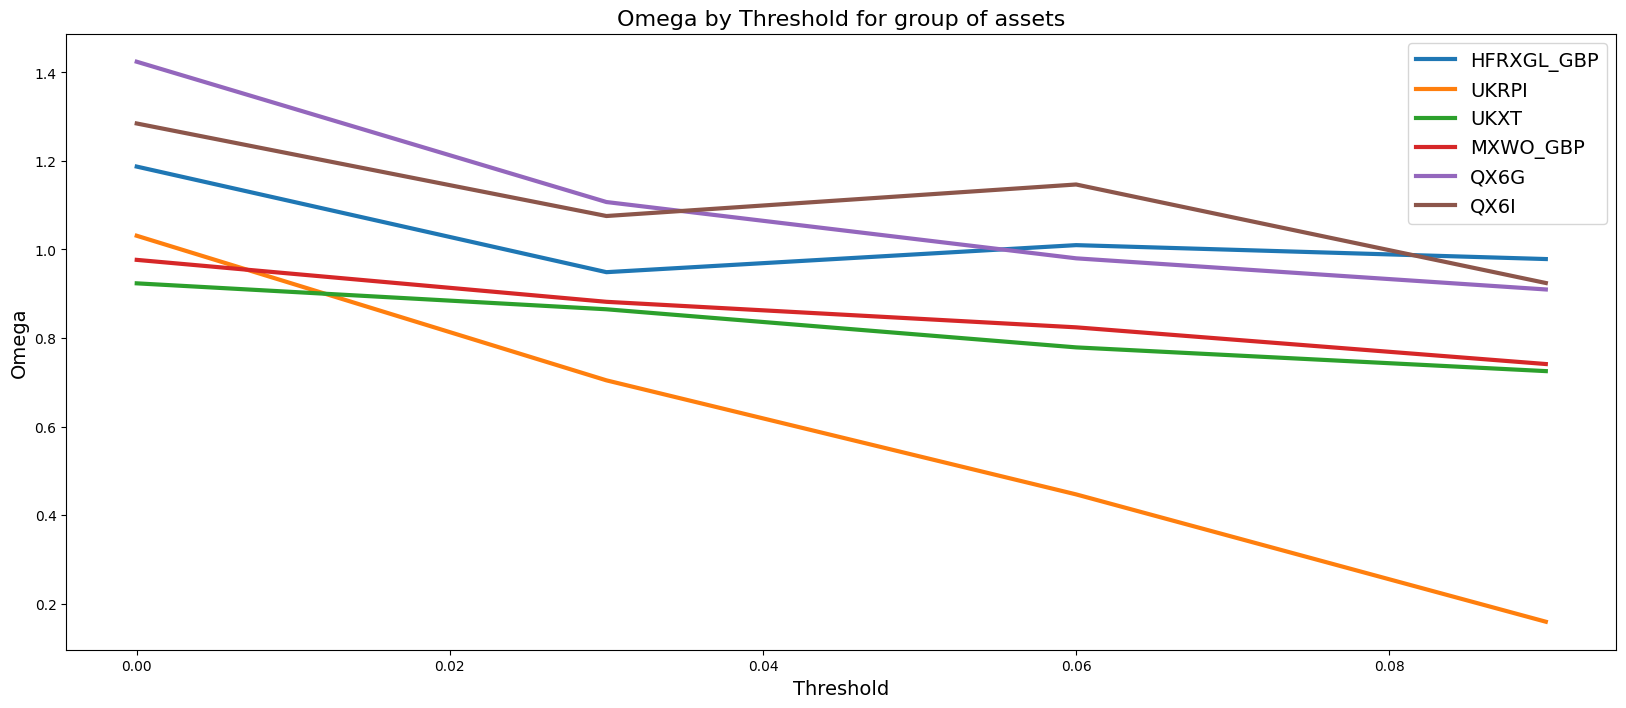

In [5]:
# Define performance_period as {'daily':252, 'weekly':52, 'monthly':12}
perf_period = 12

# Run function for some given input
omega_threshold_array = [0.00/perf_period, 0.03/perf_period, 0.06/perf_period, 0.09/perf_period]
omega_ratio = calculate_omega_ratio_multi_threshold(perf_df, omega_threshold_array, perf_period)
omega_ratio